In [2]:
import numpy as np
import qiskit.quantum_info
from sympy import *
from sympy.solvers import solve
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [3]:
file = open("key.txt", "r")
key = file.read()
IBMQ.save_account(key)
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_qasm_simulator')

eTarget = -2

configrc.store_credentials:WARNING:2021-09-13 02:01:36,166: Credentials already present. Set overwrite=True to overwrite.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

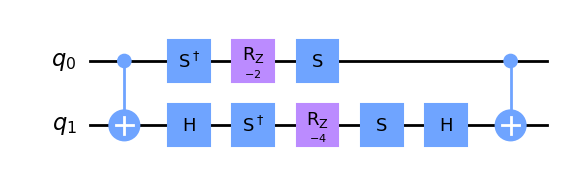

In [7]:
def make_cont_sys_circ(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(0, 1)
    temp.h(1)
    temp.sdg(0)
    temp.sdg(1)

    temp.rz(-2 * time, 0)
    temp.rz(-4 * time, 1)

    temp.s(0)
    temp.s(1)
    temp.h(1)
    temp.cx(0, 1)

    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

temp = QuantumCircuit(2)

temp.cx(0, 1)
temp.h(1)
temp.sdg(0)
temp.sdg(1)

temp.rz(-2 * 1, 0)
temp.rz(-4 * 1, 1)

temp.s(0)
temp.s(1)
temp.h(1)
temp.cx(0, 1)

temp.draw('mpl')

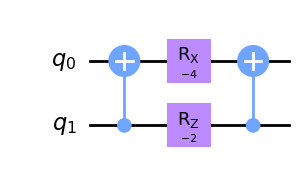

In [4]:
def make_cont_sys_circ2(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(1, 0)

    temp.rx(-4 * time, 0)
    temp.rz(-2 * time, 1)

    temp.cx(1, 0)



    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

temp = QuantumCircuit(2)

temp.cx(1, 0)

temp.rx(-4 * 1, 0)
temp.rz(-2 * 1, 1)

temp.cx(1, 0)

temp.draw('mpl')

<ipython-input-8-f74779fc334a>:6: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  rodeo.u1(1*eTarget, 0)


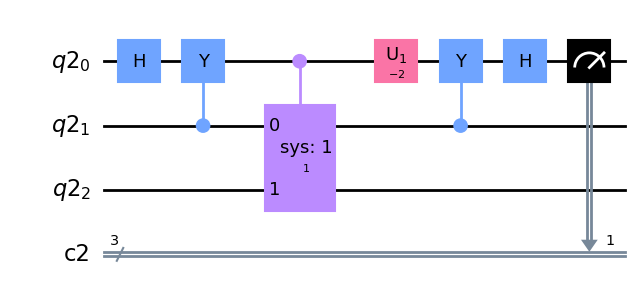

In [8]:
rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(3))

rodeo.h(0)
rodeo.cy(1, 0)
rodeo.append(make_cont_sys_circ(1), [0, 1, 2])
rodeo.u1(1*eTarget, 0)
rodeo.cy(1, 0)
rodeo.h(0)
rodeo.measure(0, 1)

rodeo.draw('mpl')

In [9]:
t1 = np.random.normal(0, 5)
t2 = np.random.normal(0, 5)
t3 = np.random.normal(0, 5)
t4 = np.random.normal(0, 5)

t1
t2
t3
t4

-0.9548940381957521

In [10]:
#low overlap -- maybe find a way to guarantee this?
# t1 = -3.874444506605847
# t2 = -1.898967104374589
# t3 = 1.2839649933026793
# t4 = 4

# times used
# t1 = -7.682971153779546
# t2 = -5.374032720012178
# t3 = 1.1135803511904725

print(t1)
print(t2)
print(t3)
print(t4)



-4.388471140002932
-10.225634621322497
-6.794134075654538
-0.9548940381957521


-6.0: 
295
{'0000': 295, '0001': 184, '0010': 57, '0011': 12, '0100': 133, '0101': 28, '0110': 249, '0111': 66}
-5.9: 
333
{'0000': 333, '0001': 135, '0010': 73, '0011': 16, '0100': 127, '0101': 34, '0110': 235, '0111': 71}
-5.8: 
353
{'0000': 353, '0001': 111, '0010': 82, '0011': 14, '0100': 109, '0101': 20, '0110': 275, '0111': 60}
-5.7: 
352
{'0000': 352, '0001': 90, '0010': 89, '0011': 18, '0100': 102, '0101': 31, '0110': 281, '0111': 61}
-5.6: 
330
{'0000': 330, '0001': 69, '0010': 106, '0011': 26, '0100': 86, '0101': 36, '0110': 310, '0111': 61}
-5.5: 
331
{'0000': 331, '0001': 45, '0010': 91, '0011': 23, '0100': 112, '0101': 21, '0110': 356, '0111': 45}
-5.4: 
325
{'0000': 325, '0001': 38, '0010': 89, '0011': 34, '0100': 119, '0101': 17, '0110': 359, '0111': 43}
-5.3: 
294
{'0000': 294, '0001': 40, '0010': 110, '0011': 26, '0100': 141, '0101': 14, '0110': 361, '0111': 38}
-5.2: 
325
{'0000': 325, '0001': 34, '0010': 92, '0011': 23, '0100': 142, '0101': 16, '0110': 361, '0111': 3

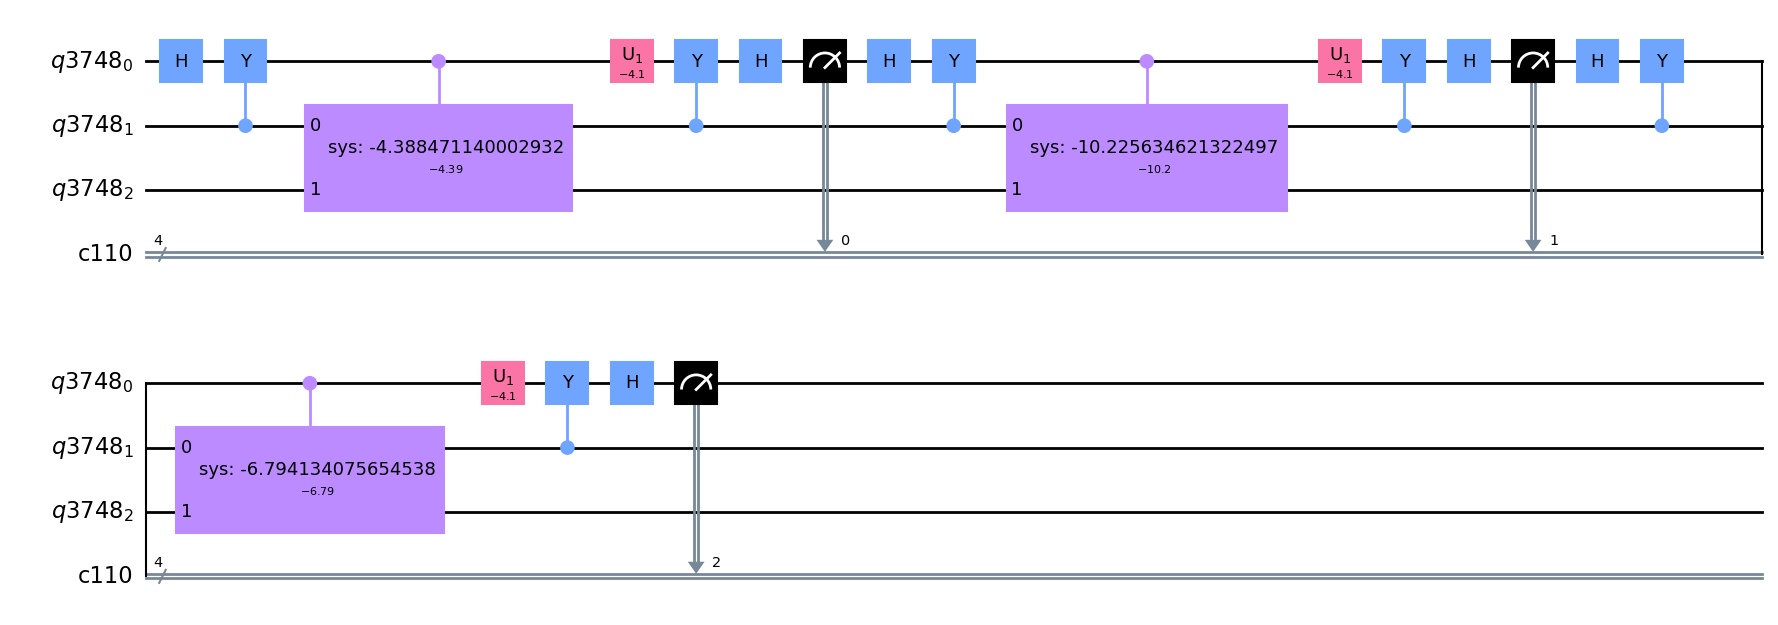

In [22]:
specSuccess4 = list()
specAll4 = list()

# initial_state = [1/sqrt(2), 0, 0, 0, 0, 0, 0, -1/sqrt(2)]
# initial_vector = qiskit.quantum_info.Statevector(initial_state)

# 000
# 001
# 010
# 011
# 100
# 101
# 110
# 111

for i in Range(20):
    #eTarget = -3 + (i) * 2
    eTarget = i/10 - 6

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(4))

    # rodeo.initialize(initial_vector)
    #rodeo.h(1)
    #rodeo.cx(1, 2)

    #rodeo.measure(0, 0)

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t1), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 0) #cbit 000n

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t2), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 1) #cbit 00n0

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t3), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 2) #cbit 0n00

    # rodeo.h(0)
    # rodeo.cy(1, 0)
    # rodeo.append(make_cont_sys_circ2(t3), [0, 1, 2])
    # rodeo.u1(eTarget, 0)
    # rodeo.cy(1, 0)
    # rodeo.h(0)
    # rodeo.measure(0, 3) #cbit n000

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('0000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')

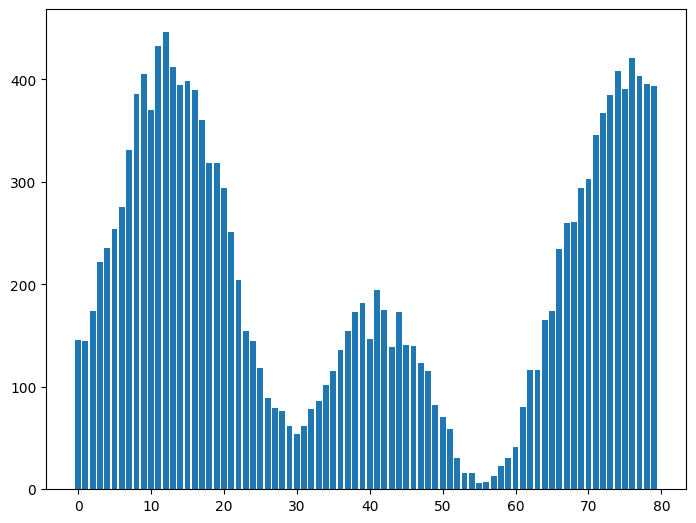

In [72]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# range = Range(80)
# ax.bar(range, specSuccess)
# plt.show()

In [10]:
print(job.result().get_counts())

{'0000': 81, '0001': 13, '0010': 86, '0011': 51, '0100': 35, '0101': 59, '0110': 82, '0111': 43, '1000': 24, '1001': 256, '1010': 29, '1011': 7, '1100': 195, '1101': 16, '1110': 28, '1111': 19}


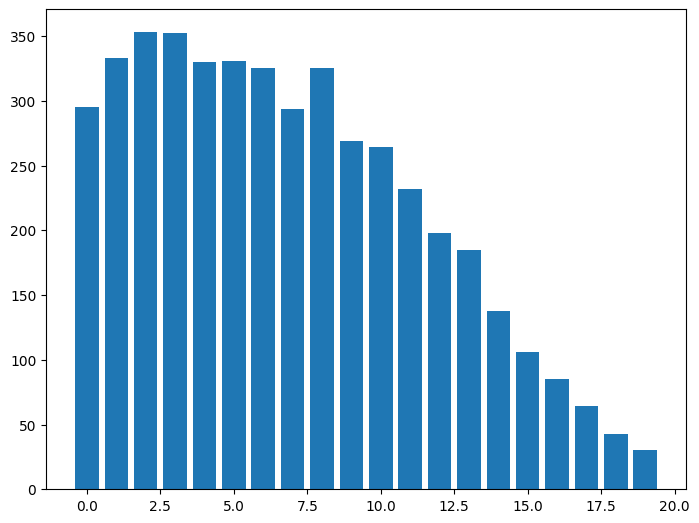

In [23]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
range2 = Range(20)
ax2.bar(range2, specSuccess4)
plt.show()

